# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set formattign options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Obtaining and organizing stock data from Google Finance

In [2]:
# import data reader package
import pandas_datareader as pdr

# read data from Yahoo! Finance for a specific 
# stock specified by ticker and between the start and end dates
def get_stock_data(ticker, start, end):
    # read the data
    data = pdr.data.DataReader(ticker, 'google', start, end)

    # rename this column
    data.insert(0, "Ticker", ticker)
    return data

In [3]:
# request the three years of data for MSFT
start = datetime(2012, 1, 1)
end = datetime(2014, 12, 31)
get_stock_data("MSFT", start, end)[:5]

           Ticker   Open   High    Low  Close    Volume
Date                                                   
2012-01-03   MSFT  26.55  26.96  26.39  26.76  64735391
2012-01-04   MSFT  26.82  27.47  26.78  27.40  80519402
2012-01-05   MSFT  27.38  27.73  27.29  27.68  56082205
2012-01-06   MSFT  27.53  28.19  27.52  28.10  99459469
2012-01-09   MSFT  28.05  28.10  27.72  27.74  59708266

In [4]:
# gets data for multiple stocks
# tickers: a list of stock symbols to fetch
# start and end are the start end end dates
def get_data_for_multiple_stocks(tickers, start, end):
    # we return a dictionary
    stocks = dict()
    # loop through all the tickers
    for ticker in tickers:
        # get the data for the specific ticker
        s = get_stock_data(ticker, start, end)
        # add it to the dictionary
        stocks[ticker] = s
    # return the dictionary
    return stocks

In [5]:
# get the data for all the stocks that we want
raw = get_data_for_multiple_stocks(
    ["MSFT", "AAPL", "GE", "IBM", "AA", "DAL", "UAL", "PEP", "KO"],
    start, end)

In [6]:
# take a peek at the data for MSFT
raw['MSFT'][:5]

           Ticker   Open   High    Low  Close    Volume
Date                                                   
2012-01-03   MSFT  26.55  26.96  26.39  26.76  64735391
2012-01-04   MSFT  26.82  27.47  26.78  27.40  80519402
2012-01-05   MSFT  27.38  27.73  27.29  27.68  56082205
2012-01-06   MSFT  27.53  28.19  27.52  28.10  99459469
2012-01-09   MSFT  28.05  28.10  27.72  27.74  59708266

In [7]:
# given the dictionary of data frames,
# pivots a given column into values with column
# names being the stock symbols
def pivot_tickers_to_columns(raw, column):
    items = []
    # loop through all dictionary keys
    for key in raw:
        # get the data for the key
        data = raw[key]
        # extract just the column specified
        subset = data[["Ticker", column]]
        # add to items
        items.append(subset)
    
    # concatenate all the items
    combined = pd.concat(items)
    # reset the index
    ri = combined.reset_index()
    # return the pivot
    return ri.pivot("Date", "Ticker", column)

In [8]:
# do the pivot
close_px = pivot_tickers_to_columns(raw, "Close")
# peek at the result
close_px[:5]

Ticker       AAPL   DAL     GE  ...     MSFT    PEP    UAL
Date                            ...                       
2012-01-03  58.75  8.04  18.36  ...    26.76  66.40  18.90
2012-01-04  59.06  8.01  18.56  ...    27.40  66.74  18.52
2012-01-05  59.72  8.33  18.55  ...    27.68  66.22  18.39
2012-01-06  60.34  8.32  18.65  ...    28.10  65.39  18.21
2012-01-09  60.25  8.28  18.86  ...    27.74  65.73  17.93

[5 rows x 8 columns]

# Plotting time-series prices

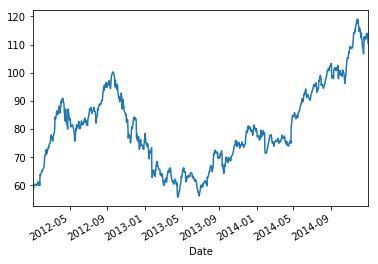

In [9]:
# plot the closing prices of AAPL
close_px['AAPL'].plot();

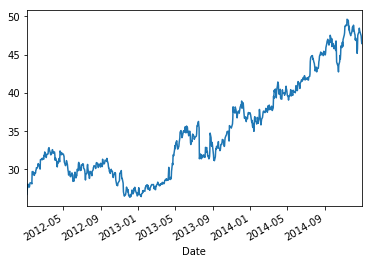

In [10]:
# plot the closing prices of MSFT
close_px['MSFT'].plot();

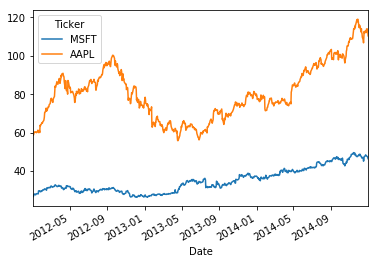

In [11]:
# plot MSFT vs AAPL on the same chart
close_px[['MSFT', 'AAPL']].plot();

In [12]:
# pivot the volume data into columns
volumes = pivot_tickers_to_columns(raw, "Volume")
volumes.tail()

Ticker          AAPL      DAL        GE   ...     \
Date                                      ...      
2014-12-24  14479611  4303380  17865138   ...      
2014-12-26  33720951  5303077  14978547   ...      
2014-12-29  27598920  6659665  20858159   ...      
2014-12-30  29881477  7318917  22184545   ...      
2014-12-31  41403351  7801706  28206452   ...      

Ticker          MSFT      PEP      UAL  
Date                                    
2014-12-24  11442790  1608616  2714807  
2014-12-26  13197817  1492689  3062153  
2014-12-29  14439518  2453829  2874473  
2014-12-30  16384692  2134434  2644611  
2014-12-31  21552450  3727376  4451235  

[5 rows x 8 columns]

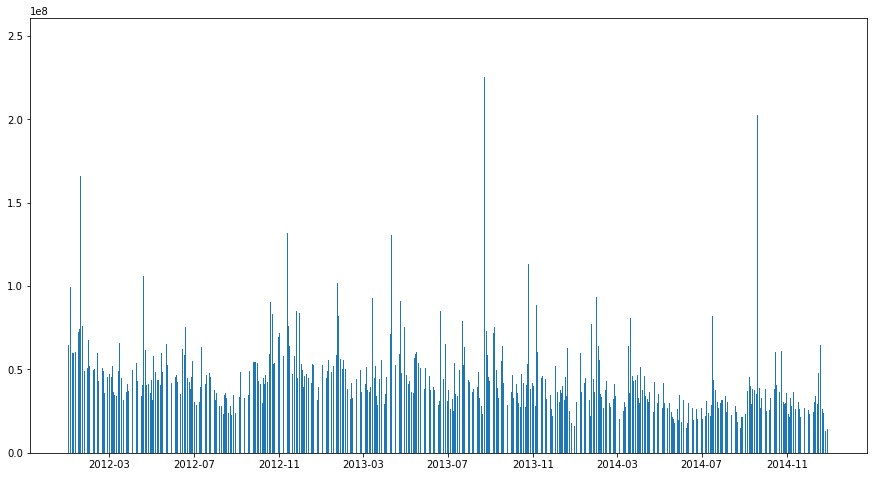

In [13]:
# plot the volume for MSFT
msft_volume = volumes[["MSFT"]]
plt.bar(msft_volume.index, msft_volume["MSFT"])
plt.gcf().set_size_inches(15,8)

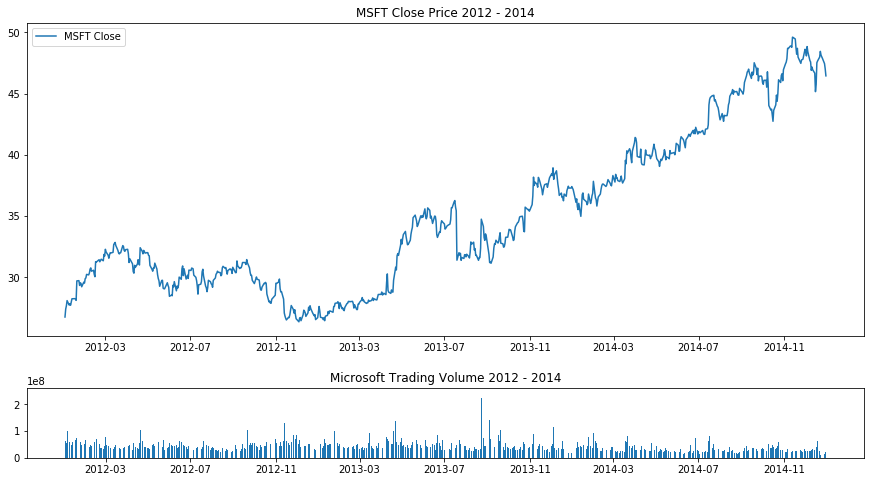

In [14]:
# draw the price history on the top
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(close_px['MSFT'].index, close_px['MSFT'], 
         label='MSFT Close')
plt.title('MSFT Close Price 2012 - 2014')
plt.legend(loc=2)

# and the volume along the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(msft_volume.index, msft_volume['MSFT'])
plt.title('Microsoft Trading Volume 2012 - 2014')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

# Calculating simple daily percentage change

In [15]:
# calculate daily percentage change
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:5]

Ticker          AAPL       DAL        GE    ...     \
Date                                        ...      
2012-01-03       NaN       NaN       NaN    ...      
2012-01-04  0.005277 -0.003731  0.010893    ...      
2012-01-05  0.011175  0.039950 -0.000539    ...      
2012-01-06  0.010382 -0.001200  0.005391    ...      
2012-01-09 -0.001492 -0.004808  0.011260    ...      

Ticker          MSFT       PEP       UAL  
Date                                      
2012-01-03       NaN       NaN       NaN  
2012-01-04  0.023916  0.005120 -0.020106  
2012-01-05  0.010219 -0.007791 -0.007019  
2012-01-06  0.015173 -0.012534 -0.009788  
2012-01-09 -0.012811  0.005200 -0.015376  

[5 rows x 8 columns]

In [16]:
# check the percentage on 2012-01-05
close_px.loc['2012-01-05']['AAPL'] / \
    close_px.loc['2012-01-04']['AAPL'] -1

0.011175076193701283

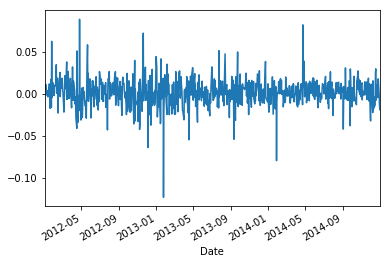

In [17]:
# plot daily percentage change for AAPL
daily_pc["AAPL"].plot();

# Calculating simple daily cumulative returns

In [18]:
# calculate daily cumulative return
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

Ticker          AAPL       DAL        GE    ...     \
Date                                        ...      
2012-01-03       NaN       NaN       NaN    ...      
2012-01-04  1.005277  0.996269  1.010893    ...      
2012-01-05  1.016511  1.036070  1.010349    ...      
2012-01-06  1.027064  1.034826  1.015795    ...      
2012-01-09  1.025532  1.029851  1.027233    ...      

Ticker          MSFT       PEP       UAL  
Date                                      
2012-01-03       NaN       NaN       NaN  
2012-01-04  1.023916  1.005120  0.979894  
2012-01-05  1.034380  0.997289  0.973016  
2012-01-06  1.050075  0.984789  0.963492  
2012-01-09  1.036622  0.989910  0.948677  

[5 rows x 8 columns]

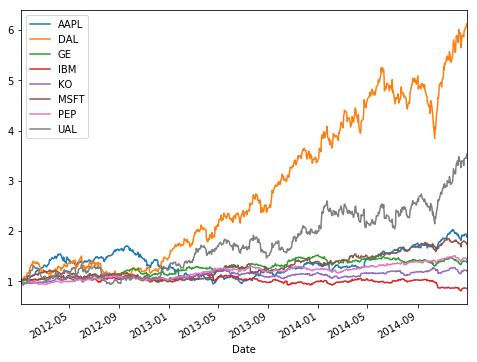

In [19]:
# plot all the cumulative returns to get an idea 
# of the relative performance of all the stocks
daily_cr.plot(figsize=(8,6))
plt.legend(loc=2);

# Resampling data from daily to monthly returns

In [20]:
# resample to end of month and forward fill values
monthly = close_px.asfreq('M').ffill()
monthly[:5]

Ticker       AAPL    DAL     GE  ...     MSFT    PEP  \
Date                             ...                   
2012-01-31  65.21  10.55  18.71  ...    29.53  65.67   
2012-02-29  77.49   9.81  19.05  ...    31.74  62.94   
2012-03-31  77.49   9.81  19.05  ...    31.74  62.94   
2012-04-30  83.43  10.96  19.58  ...    32.02  66.00   
2012-05-31  82.53  12.10  19.09  ...    29.19  67.85   

Ticker        UAL  
Date               
2012-01-31  23.10  
2012-02-29  20.65  
2012-03-31  20.65  
2012-04-30  21.92  
2012-05-31  25.17  

[5 rows x 8 columns]

In [21]:
# calculate the monthly percentage changes
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

Ticker          AAPL       DAL        GE    ...     \
Date                                        ...      
2012-01-31       NaN       NaN       NaN    ...      
2012-02-29  0.188315 -0.070142  0.018172    ...      
2012-03-31  0.000000  0.000000  0.000000    ...      
2012-04-30  0.076655  0.117227  0.027822    ...      
2012-05-31 -0.010787  0.104015 -0.025026    ...      

Ticker          MSFT       PEP       UAL  
Date                                      
2012-01-31       NaN       NaN       NaN  
2012-02-29  0.074839 -0.041571 -0.106061  
2012-03-31  0.000000  0.000000  0.000000  
2012-04-30  0.008822  0.048618  0.061501  
2012-05-31 -0.088382  0.028030  0.148266  

[5 rows x 8 columns]

In [22]:
# calculate monthly cumulative return
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

Ticker          AAPL       DAL        GE    ...     \
Date                                        ...      
2012-01-31       NaN       NaN       NaN    ...      
2012-02-29  1.188315  0.929858  1.018172    ...      
2012-03-31  1.188315  0.929858  1.018172    ...      
2012-04-30  1.279405  1.038863  1.046499    ...      
2012-05-31  1.265603  1.146919  1.020310    ...      

Ticker          MSFT       PEP       UAL  
Date                                      
2012-01-31       NaN       NaN       NaN  
2012-02-29  1.074839  0.958429  0.893939  
2012-03-31  1.074839  0.958429  0.893939  
2012-04-30  1.084321  1.005025  0.948918  
2012-05-31  0.988486  1.033196  1.089610  

[5 rows x 8 columns]

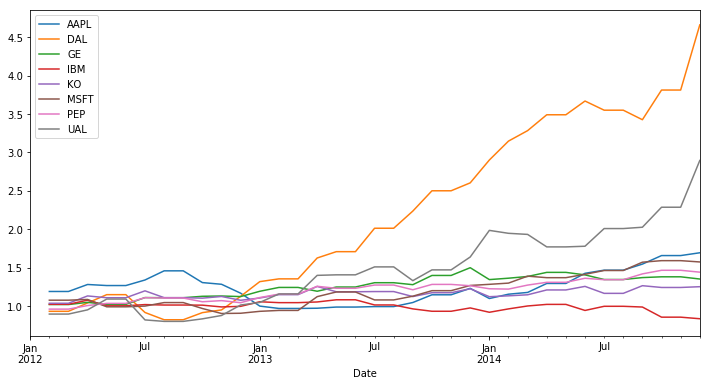

In [23]:
# plot the monthly cumulative returns
monthly_cr.plot(figsize=(12,6))
plt.legend(loc=2);

# Analyzing distribution of returns

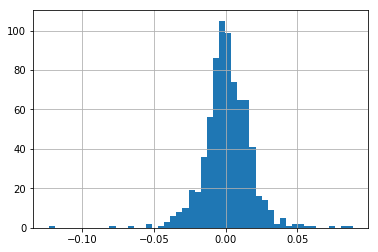

In [24]:
# histogram of the daily percentage change for AAPL
aapl = daily_pc['AAPL']
aapl.hist(bins=50);

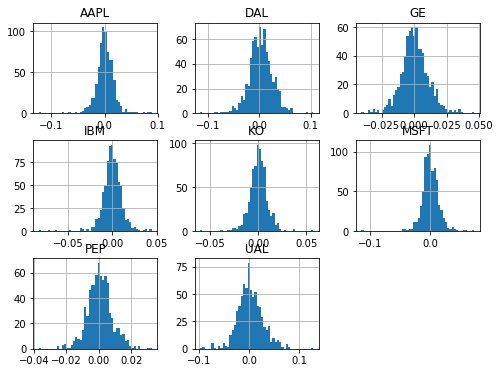

In [25]:
# matrix of all stocks daily % changes histograms
daily_pc.hist(bins=50, figsize=(8,6));

# Performing moving average calculation

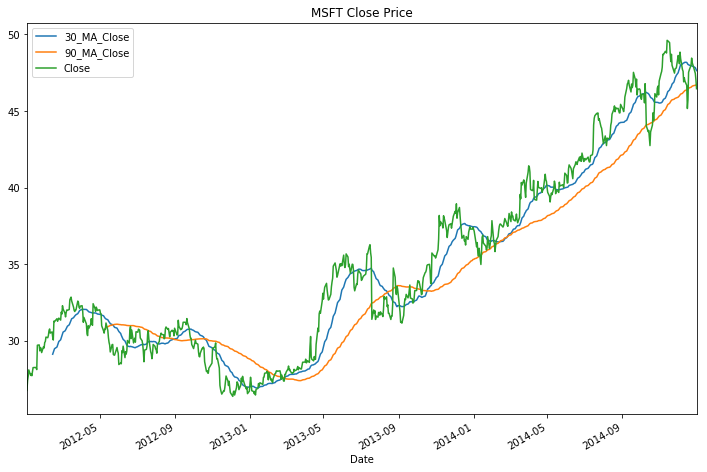

In [26]:
# extract just MSFT close
msft_close = close_px[['MSFT']]['MSFT']
# calculate the 30 and 90 day rolling means
ma_30 = msft_close.rolling(window=30).mean()
ma_90 = msft_close.rolling(window=90).mean()
# compose into a DataFrame that can be plotted
result = pd.DataFrame({'Close': msft_close, 
                       '30_MA_Close': ma_30,
                       '90_MA_Close': ma_90})
# plot all the series against each other
result.plot(title="MSFT Close Price")
plt.gcf().set_size_inches(12,8)

# Comparision of average daily returns across stocks

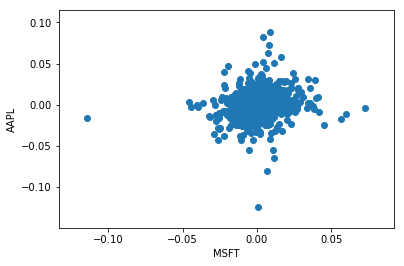

In [27]:
# plot the daily percentage change of MSFT vs AAPL
plt.scatter(daily_pc['MSFT'], daily_pc['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL');

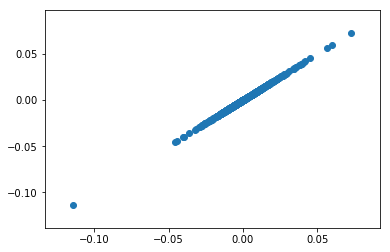

In [28]:
# demonstrate perfect correlation
plt.scatter(daily_pc['MSFT'], daily_pc['MSFT']);

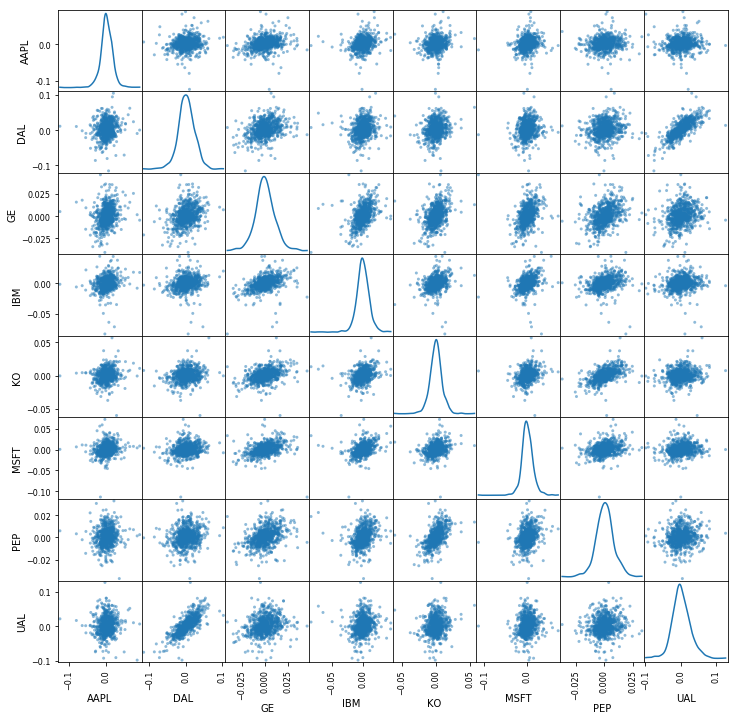

In [29]:
from pandas.plotting import scatter_matrix
# plot the scatter of daily price changed for ALL stocks
scatter_matrix(daily_pc, diagonal='kde', figsize=(12,12));

# Correlation of stocks based upon daily percentage change of closing price

In [30]:
# calculate the correlation between all the stocks relative
# to daily percentage change
corrs = daily_pc.corr()
corrs

Ticker      AAPL       DAL        GE    ...         MSFT  \
Ticker                                  ...                
AAPL    1.000000  0.136735  0.238862    ...     0.182679   
DAL     0.136735  1.000000  0.318175    ...     0.152912   
GE      0.238862  0.318175  1.000000    ...     0.340657   
IBM     0.213404  0.166197  0.427995    ...     0.354523   
KO      0.157938  0.187258  0.386182    ...     0.267434   
MSFT    0.182679  0.152912  0.340657    ...     1.000000   
PEP     0.096834  0.174259  0.373409    ...     0.280881   
UAL     0.061678  0.761239  0.236525    ...     0.127748   

Ticker       PEP       UAL  
Ticker                      
AAPL    0.096834  0.061678  
DAL     0.174259  0.761239  
GE      0.373409  0.236525  
IBM     0.252805  0.122614  
KO      0.553575  0.139636  
MSFT    0.280881  0.127748  
PEP     1.000000  0.124301  
UAL     0.124301  1.000000  

[8 rows x 8 columns]

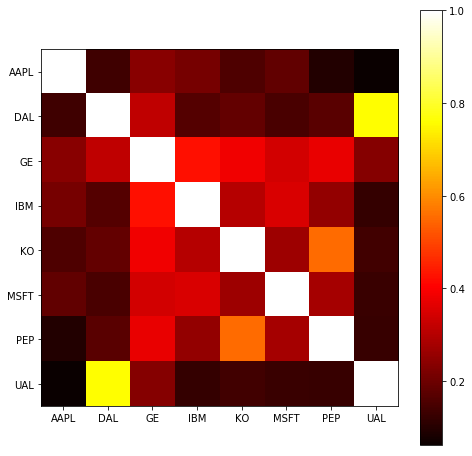

In [31]:
# plot a heatmap of the correlations
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8,8)

# Volatility

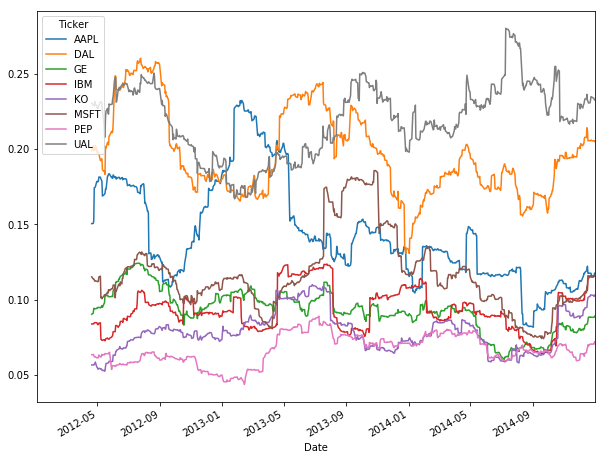

In [32]:
# 75 period minimum
min_periods = 75
# calculate the volatility
vol = daily_pc.rolling(window=min_periods).std() * \
        np.sqrt(min_periods)
# plot it
vol.plot(figsize=(10, 8));

# Determining risk relative to expected returns

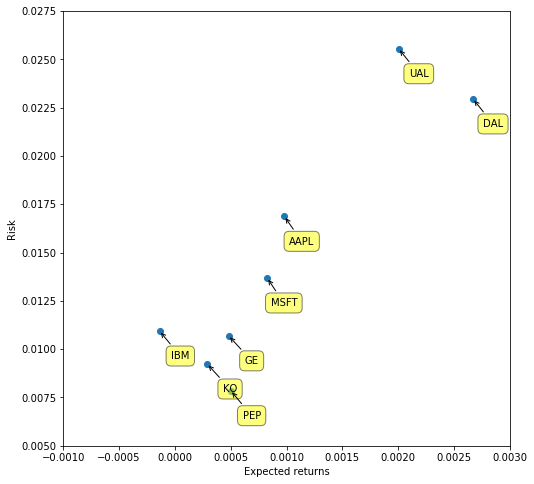

In [33]:
# generate a scatter of the mean vs std of daily % change
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# this adds fancy labels to each dot, with an arrow too
for label, x, y in zip(daily_pc.columns, 
                       daily_pc.mean(), 
                       daily_pc.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', 
        va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', 
                    fc = 'yellow', 
                    alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', 
                          connectionstyle = 'arc3,rad=0'))

# set ranges and scales for good presentation
plt.xlim(-0.001, 0.003)
plt.ylim(0.005, 0.0275)

# set size
plt.gcf().set_size_inches(8,8)